<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def findNorm(vector):
  sum=0
  for item in vector:
    sum += item**2
  return math.sqrt(sum)

def findInnerProduct(vector1,vector2):
  innerProduct = 0
  for i in range(len(vector1)):
   innerProduct+= vector1[i] * vector2[i]
  return innerProduct

## **1.3 Linear Regression**
Important Topics:
* QR decomposition
* Least Squares
* Linear Regression


#### **QR decomposition**:
* useful procedure to solve least squares problem
* utilizes Gram-Schmidt orthoganolization to obtain an orthonormal basis
* A = QR\
\
\
Q = $[q_1,q_2,q_3,...]$\
R = \begin{bmatrix}
    r_{11} & r_{12} & r_{1,3} & ... \\
    0 & r_{22} & r_{23} & ...\\
    0 & 0 & r_{33} & ... \\
    ... & ... & ... & r_{nn}
  \end{bmatrix}

* *How to derive QR is addressed in my 1.2 notes*


In [124]:
def findQR(matrix, dimensions):
  xn = np.split(matrix, dimensions, axis = -1)


  p = [dimensions,dimensions]
  xhat = []
  R = np.zeros([dimensions, dimensions])

  xhat.append(np.multiply(1.0/(findNorm(xn[0])) , xn[0]))


  for i in range(1,dimensions):
    p[i-1] = np.zeros((dimensions,1))
    for j in range(0, i):
      p[i-1] = np.add(p[i-1],np.multiply(findInnerProduct(xn[i],xhat[j]),xhat[j]))
    xhat.append(np.multiply(1/(findNorm(xn[i] - p[i-1])),(xn[i]-p[i-1])))
  Q = np.column_stack((xhat[0],xhat[1]))
  for i in range(1,dimensions-1):
    Q = np.column_stack((Q,xhat[i+1]))

  R[0,0] = findNorm(xn[0])
  for j in range(dimensions):
    for k in range(1,dimensions):
      if(j > k):
        R[j,k] = 0
      if(j==k):
        R[j,k] = findNorm(xn[j] - p[j-1])
      if(j < k ):
        R[j,k] = findInnerProduct(xn[k],xhat[j])

  return Q,R


#example of a 3x3
#representing columns not rows!
x1 = [1.0, 0.0, 1.0]
x2 = [0.0, 2.0, 1.0]
x3 = [1.0, 2.0, 1.0]

A = np.concatenate((np.array(x1).reshape(-1,1),np.array(x2).reshape(-1,1),np.array(x3).reshape(-1,1)), axis = 1)
print(A)

Q, R = findQR(A,3)
print("Q:",Q)
print("R:",R)
print("A-QR:",(A - np.dot(Q, R))) #shows A = QR


[[1. 0. 1.]
 [0. 2. 2.]
 [1. 1. 1.]]
Q: [[ 0.70710678 -0.23570226  0.66666667]
 [ 0.          0.94280904  0.33333333]
 [ 0.70710678  0.23570226 -0.66666667]]
R: [[1.41421356 0.70710678 1.41421356]
 [0.         2.12132034 1.88561808]
 [0.         0.         0.66666667]]
A-QR: [[0.00000000e+00 2.74498744e-18 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


#### **Least Squares and Linear Regression**:
* Is an approach to solving $Ax = b$ for an over-determined matrix $A$.
* find the value $x$, which minimizes the function $Ax-b$


* By left multiplying either side of $Ax = b$ by $A^T$, we obtain $A^TAx = A^Tb$
* Now that $A^TA$ is a $n*n$ matrix, we can easily obtain its inverse.
* solving for $x$, we obtain $x = (A^TA)^{-1}A^Tb$


**Solving Least Squares using QR decomposition:**
* $A^TAx = A^Tb$ → $(QR)^T(QR)x = (QR)^Tb$ → $(R^TQ^T)(QR)x = (R^TQ^T)b$ → $Rx^* = Q^Tb$
* The matrix of the orthogonal projection onto R(A) is: $P = QQ^T$
\
\
  **Formulating A and b from data points:**\
  * $Ax = b → Xc = y$\
  y = \begin{bmatrix}
    y_{1} \\
    y_{2} \\
    ... \\
    y_{m}
  \end{bmatrix} X= \begin{bmatrix}
    1 & x_{1} & ... & x_1^{n-1} \\
    1 & x_{2} & ... & x_2^{n-1}\\
    ... & ... & ... & ... \\
    1 & x_m & ... & x_m^{n-1}
  \end{bmatrix}\
    c = \begin{bmatrix}
    c_{1} \\
    c_{2} \\
    ... \\
    c_{m}
    \end{bmatrix}
  

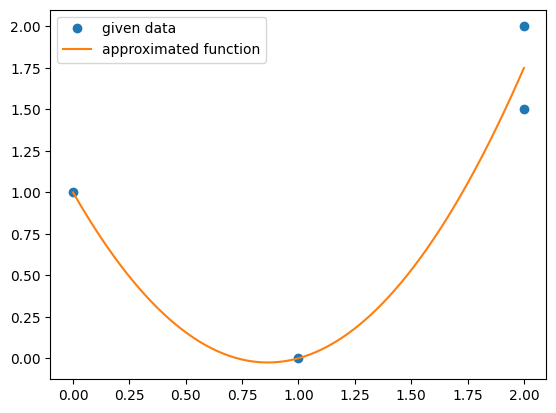

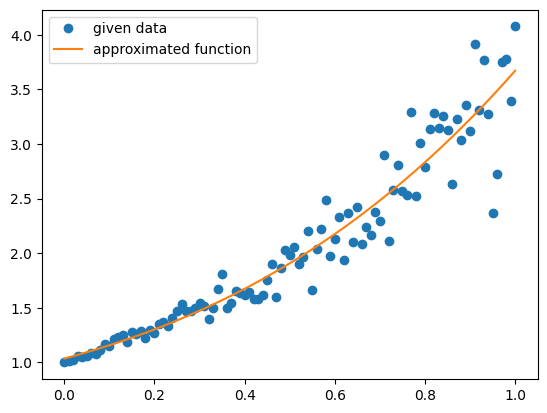

In [59]:
#fit y = c0 + c1x + c2x^2 to data given
def f1(c,x):
  return c[0] + c[1]*x + c[2]*x**2

def f2(c,x):
  return c[0] + c[1]*x + c[2]*x**2 +c[3]*x**3



##EXAMPLE 1##
xi = [0.0,1.0,2.0,2.0]
yi = [1.0,0.0,(3.0/2.0),2.0]

xlist = np.linspace(0.0, 2.0, num = 500)

X = np.column_stack(([1.0,1.0,1.0,1.0],xi, np.multiply(xi,xi)))
Q,R = np.linalg.qr(X)

c = np.dot(np.dot(np.linalg.inv(R), Q.transpose()),yi)
ylist = f1(c,xlist)

plt.plot(xi, yi, 'o', label = "given data")
plt.plot(xlist,ylist, label = "approximated function")
plt.legend()
plt.show()


##EXAMPLE 2##
xi = np.linspace(0, 1, 101)
yi = 1 + xi + xi * np.random.random(len(xi)) + np.multiply(xi,xi) *np.random.random(len(xi)) + np.multiply(np.multiply(xi, xi),xi) * np.random.random(len(xi))

X = np.stack((np.ones(len(xi)), xi,xi**2, xi**3), axis = -1)


Q,R = np.linalg.qr(X)

c = np.dot(np.dot(np.linalg.inv(R), Q.transpose()),yi)
ylist = f2(c,xi)

plt.plot(xi, yi, 'o', label = "given data")
plt.plot(xi,ylist, label = "approximated function")
plt.legend()
plt.show()






